# Proyecto 1

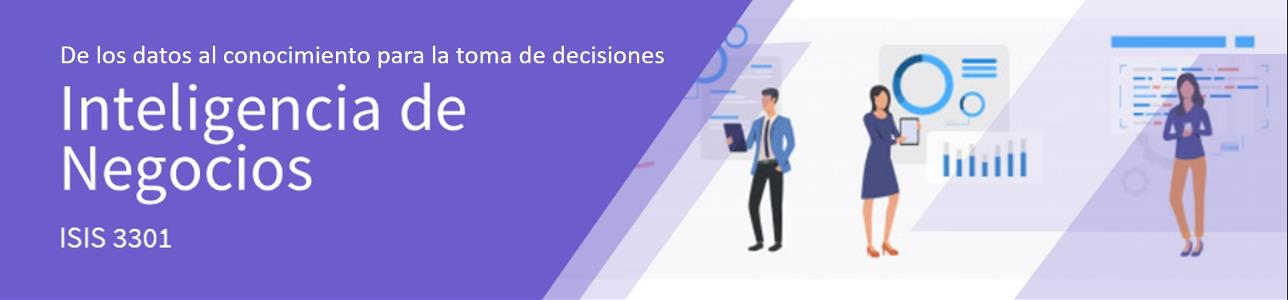

## Problema
<p style="text-align: justify;"> ...

La oportunidad de negocio consiste en mejorar la atracción turística en Colombia mediante el análisis de las características de los sitios turísticos. El problema radica en identificar qué aspectos hacen atractivos a estos sitios para los turistas y cuáles son aquellos que reciben bajas recomendaciones, afectando así el número de visitantes. Además, se busca determinar la calificación que tendrá un sitio turístico por parte de los turistas, lo que permitirá aplicar estrategias para mejorar su popularidad y fomentar el turismo.

 Un algoritmo de clasificación es una técnica de aprendizaje automático que se utiliza para categorizar o etiquetar datos en diferentes clases o categorías. Este modelo se utiliza luego para asignar automáticamente clases a nuevos ejemplos basándose en sus características. En este caso, queremos asignar la calificación de cada uno de los reviews recibidos dentro de un rango de 1-5.

# 1. Instalación e importación de librerías.

In [ ]:
# librería para manejar .... el español.
!pip install nltk
!pip install es_core_news_sm
import es_core_news_sm
# Manejo de gráficas
!pip install scikit-plot
!pip install keras
!pip install wordcloud
#Detectar idiomas
!pip install langdetect


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.8/668.8 kB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 113.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Not uninstalling pydantic at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pydantic'. No files were found to uninstall.
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Not uninstalling thinc at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'thinc'. No files were found to uninstall.
  Attempting uninstall: spacy
    Found existi

In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')



# Instalación de librerias
import pandas as pd
import numpy as np
import sys
import spacy

!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import learning_curve
from wordcloud import WordCloud

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from keras.layers import Dropout, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils import to_categorical
import seaborn as sns
from keras.layers import Dropout


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

from scipy import stats as st

from langdetect import detect
from langdetect import DetectorFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.3/686.3 kB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 89.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Perfilamiento y entendimiento de los datos

In [ ]:
reviews_df = pd.read_csv('/work/tipo2_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')

In [ ]:
reviews_df.sample(5)

,Review,Class
1214,El vestíbulo es muy agradable y posee varios r...,3
7009,Es una sorpresa magnífica cuando te sientas en...,5
876,El Malecon siempre ha sido el lugar preferido ...,4
3570,Otro bonito lugar pequeño en el centro históri...,3
7518,El lugar está bien pero los precios no van de ...,2


Se puede ver que la información suministrada esta en UTF-8 y que la codificación se esta realizando correctamente. Sin embargo, se procede a revisar caracteres anormales:

In [ ]:
# Define a function that searches for non-ASCII characters
def find_non_ascii(text):
    # This regex pattern matches any character that's not in the standard ASCII set
    pattern = r'[^\x00-\x7F]'
    if re.search(pattern, text):
        return True
    return False

# Apply the function to each review in the DataFrame
reviews_df['has_non_ascii'] = reviews_df['Review'].apply(find_non_ascii)

# Filter the DataFrame to show only reviews with non-ASCII characters
non_ascii_df = reviews_df[reviews_df['has_non_ascii']]

# Print out some examples
print(non_ascii_df['Review'].head())

# You can also get a sense of how prevalent these characters are
print(f"Number of entries with non-ASCII characters: {len(non_ascii_df)}")

# If you want to see the unique non-ASCII characters, you could do:
non_ascii_chars = set(re.findall(r'[^\x00-\x7F]', ' '.join(reviews_df['Review'])))
print(f"Unique non-ASCII characters found: {non_ascii_chars}")

0    Muy buena atención y aclaración de dudas por p...
1    Buen hotel si están obligados a estar cerca de...
2    Es un lugar muy lindo para fotografías, visite...
3    Abusados con la factura de alimentos siempre s...
4    Tuvimos un par de personas en el grupo que rea...
Name: Review, dtype: object
Number of entries with non-ASCII characters: 6994
Unique non-ASCII characters found: {'Ó', '♂', 'ï', '½', 'Š', '😅', 'ã', '°', '✌', '🥴', '🤙', '🏻', '😡', '👊', '´', '😥', 'à', 'Á', '£', 'À', 'é', '💧', 'å', '–', 'É', '♡', '😎', '❤', '‘', 'Í', 'ê', 'ú', '“', '¡', 'ŕ', '😊', '😵', '🎉', '🏼', '🏽', 'õ', '€', '✔', '️', '🥰', 'á', '¿', '”', 'Ñ', '☀', '😃', '🤤', 'ò', '\xa0', 'í', '\u200d', 'ó', '✅', '…', '»', 'ç', 'ª', 'ĺ', '«', '😬', 'ì', '😔', '👌', '’', 'º', '🤩', '💕', '🤦', '🥳', 'ü', '★', 'ń', 'Ú', 'Ì', 'è', '🆓', '👍', '😄', '³', '⭐', '✊', '🍸', '🤯', '🤪', 'ñ', '💚', 'Â', '💯'}


Se encuentran 6994 caracteres que no pertenecen al código ASCII. Sin embargo, no todos estos caracteres se pueden eliminar ya que las vocales que se acentúan en el español no están incluidas en este código y son relevantes para el modelo, pues la acentuación de una palabra puede cambiar su significado. En la etapa de Preparación de datos se limpiara esto. Por ahora hace parte del entendimiento de los datos.

De la misma manera se indagara si los reviews tienen puntuaciones ( que seran innecesarias por lo tanto, eliminadas para el modelo más adelante)

In [ ]:
def contains_punctuation(text):
    if isinstance(text, str):
        # Define the regex pattern for punctuation
        pattern = r'[^\w\s]'
        # Search for any punctuation in the string
        if re.search(pattern, text):
            return True
    return False

initial_punctuation_check = reviews_df.applymap(contains_punctuation)

# Summarize to see if there's any punctuation
print("Before removal, cells with punctuation:", initial_punctuation_check.any().sum())

Before removal, cells with punctuation: 1
/tmp/ipykernel_130/1962304189.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  initial_punctuation_check = reviews_df.applymap(contains_punctuation)


Se entiende que el dataFrame no contiene puntuación. ( la única ocurrencia se borrara más adelante en la etapa de transformación).

In [ ]:
#Copiar los datos
reviews_df = reviews_df.copy()

#Contar el tamaño de cada review
reviews_df['Conteo'] = [len(x) for x in reviews_df['Review']]

#Contar número máximo de apariciones
reviews_df['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in reviews_df['Review']]

#Contar número mínimo de apariciones
reviews_df['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in reviews_df['Review']]

#Hallar la moda de la review
moda_por_reseña = []
for reseña in reviews_df['Review']:
    palabras = reseña.split()  # Divide la reseña en palabras
    moda = st.mode(palabras).mode[0]  # Encuentra la moda de las palabras
    moda_por_reseña.append(moda)

# Agrega la moda como una nueva columna en el DataFrame
reviews_df['Moda'] = moda_por_reseña

reviews_df

/tmp/ipykernel_130/3153565675.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = st.mode(palabras).mode[0]  # Encuentra la moda de las palabras
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/tmp/ipykernel_130/3153565675.py:17: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/

,Review,Class,has_non_ascii,Conteo,Max,Min,Moda
0,Muy buena atención y aclaración de dudas por p...,5,True,252,20,0,de
1,Buen hotel si están obligados a estar cerca de...,3,True,297,13,1,de
2,"Es un lugar muy lindo para fotografías, visite...",5,True,104,12,1,Es
3,Abusados con la factura de alimentos siempre s...,3,True,422,14,1,y
4,Tuvimos un par de personas en el grupo que rea...,3,True,419,14,1,el
...,...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,True,113,11,2,el
7871,"Fue una escapada de un día desde el complejo, ...",4,True,261,12,2,de
7872,La Plaza de la Revolución es un lugar emblemát...,3,True,777,14,1,de
7873,Es la segunda ocasión que me quedo en los cuar...,1,True,651,12,0,de


# 3. Preparación de datos

### 3.1 Completitud

En este punto se identifican si existen problemas de completitud para reportarlos e identificar posibles soluciones que se trabajan en la etapa de preparación de datos

In [ ]:
#Revisar cantidad de nulos
reviews_df.isnull().sum()

Review           0
Class            0
has_non_ascii    0
Conteo           0
Max              0
Min              0
Moda             0
dtype: int64

No se encuentran valores nulos dentro del dataframe.

### 31. Unicidad

Identificar cuantas filas repetidas hay de acuerdo con todas las columnas

In [ ]:
#Revisar cantidad de registros duplicados
reviews_df.duplicated().sum()

73

Ya que 

In [ ]:
#Borrar duplicados
reviews_df = reviews_df.drop_duplicates()

### 3.3 Consistencia

La consistencia de los datos es definida en términos de la integridad de los datos entre diferentes filas o columnas de una fuente o varias fuentes. En este caso, se identifican los idiomas que existen en el dataframe 

In [ ]:
DetectorFactory.seed = 0

def detect_laguages(text):
    try:
        return detect(text)
    except:
        return None

reviews_df['language'] = reviews_df['Review'].apply(detect_laguages)
reviews_df['language'].value_counts()

/tmp/ipykernel_130/1400610423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['language'] = reviews_df['Review'].apply(detect_laguages)


language
es    7794
en       3
pt       2
it       2
sq       1
Name: count, dtype: int64

In [ ]:
#Delete rows from others languages
# Keep only rows where the detected language is 'es' for Spanish
reviews_df = reviews_df[reviews_df['language'] == 'es']

# Optionally, if you want to drop the language column afterwards
reviews_df = reviews_df.drop('language', axis=1)

# Display the modified DataFrame to verify the changes
print(reviews_df.head())

                                              Review  Class  has_non_ascii  \
0  Muy buena atención y aclaración de dudas por p...      5           True   
1  Buen hotel si están obligados a estar cerca de...      3           True   
2  Es un lugar muy lindo para fotografías, visite...      5           True   
3  Abusados con la factura de alimentos siempre s...      3           True   
4  Tuvimos un par de personas en el grupo que rea...      3           True   

   Conteo  Max  Min Moda  
0     252   20    0   de  
1     297   13    1   de  
2     104   12    1   Es  
3     422   14    1    y  
4     419   14    1   el  


Se eliminan correctamente los reviews con otro idioma distinto al español.

También, se procede a eliminar todos los valores que no pertenecen al código ASCII dejando solo las vocales acentuadas y la 'ñ'.

In [ ]:
# Define a function that removes non-ASCII characters except for the specified list
def remove_non_ascii_except_accents(text):
    # List of characters to exclude from removal
    exclude_chars = ['á', 'é', 'í', 'ó', 'ú', 'ñ']
    # Create a regex pattern that matches any character that's not in ASCII or the exclude_chars list
    pattern = r'[^\x00-\x7Fáéíóú]'
    # Replace matched characters with an empty string
    text = re.sub(pattern, '', text)
    return text

# Apply the function to each review in the DataFrame
reviews_df['Review'] = reviews_df['Review'].apply(remove_non_ascii_except_accents)

# Display the DataFrame to verify changes
print(reviews_df.head())

non_ascii_chars = set(re.findall(r'[^\x00-\x7F]', ' '.join(reviews_df['Review'])))

#Se valida que solo queden vocales acentuadas
print(f"Unique non-ASCII characters found: {non_ascii_chars}")


                                              Review  Class  has_non_ascii  \
0  Muy buena atención y aclaración de dudas por p...      5           True   
1  Buen hotel si están obligados a estar cerca de...      3           True   
2  Es un lugar muy lindo para fotografías, visite...      5           True   
3  Abusados con la factura de alimentos siempre s...      3           True   
4  Tuvimos un par de personas en el grupo que rea...      3           True   

   Conteo  Max  Min Moda  
0     252   20    0   de  
1     297   13    1   de  
2     104   12    1   Es  
3     422   14    1    y  
4     419   14    1   el  
Unique non-ASCII characters found: {'ó', 'ú', 'í', 'é', 'á'}


Se valida y se eliminan todos lo caracteres que no pertenecen al código ASCII como emojis, caracteres especiales y acentuaciones que no pertenecen al español. Se deciden borrar estos últimos ya que no son relevantes para el modelo.

### 3.4 Validez

Revisar que los valores asignados tengan sentido para el negocio. 

### 3.5 Normalización

En la normalización de los datos se realiza la conversión de todo el texto a minúsculas par mantener la uniformidad 

In [ ]:
# to lowercase
reviews_df = reviews_df.applymap(lambda x: x.lower() if type(x) == str else x)

reviews_df.sample(5)

/tmp/ipykernel_130/2684305235.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reviews_df = reviews_df.applymap(lambda x: x.lower() if type(x) == str else x)


,Review,Class,has_non_ascii,Conteo,Max,Min,Moda
1702,la zona arqueológica está cerrada. pasó un hur...,1,True,242,17,1,está
3755,si bien el hotel esta un poco alejado del cent...,4,False,264,14,1,del
283,este restaurante esta bajando mucho la calidad...,3,True,279,11,0,de
1688,excelente lugar para disfrutar de la naturalez...,4,False,158,11,0,para
3858,"el cabrito es exquisito, la carne esta que se ...",5,False,212,11,1,es


### 3.6 Transformaciones

Para las transformaciones se debe remover la puntuación al no ser relevante para el modelo.

In [ ]:
def remove_punctuation(text):
    if isinstance(text, str):
        # Define the regex pattern for punctuation
        pattern = r'[^\w\s]'
        # Replace punctuation with an empty string
        return re.sub(pattern, '', text)
    return text

reviews_df = reviews_df.applymap(remove_punctuation)

final_punctuation_check = reviews_df.applymap(contains_punctuation)
print("After removal, cells with punctuation:", final_punctuation_check.any().sum())


/tmp/ipykernel_130/638084414.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reviews_df = reviews_df.applymap(remove_punctuation)
/tmp/ipykernel_130/638084414.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_punctuation_check = reviews_df.applymap(contains_punctuation)
After removal, cells with punctuation: 0


también se deben eliminar las palabras que no aportan mucho significado como artículos, pronombres y conjunciones

In [ ]:
# Load Spanish stopwords
spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(text):
    if isinstance(text, str):
        # Tokenize the text and remove stopwords
        words = text.split()
        filtered_words = [word for word in words if word not in spanish_stopwords]
        # Join the words back into a string
        return ' '.join(filtered_words)
    return text

reviews_df['Review'] = reviews_df['Review'].apply(remove_stopwords)

Por ultimo se deben lematizar los reviews, este proceso puede ayudar a normalizar las palabras según su significado básico, lo que mejora el rendimiento de tareas de procesamiento de textos como la búsqueda, la recuperación de datos y el análisis de la información.

In [ ]:
# Load the Spanish tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("es_core_news_sm")

# Example function to lemmatize text
def lemmatize_text(text):
    # Process the text with Spacy
    doc = nlp(text)
    # Extract the lemma for each token and join
    return " ".join([token.lemma_ for token in doc])

# Applying the lemmatization function to a DataFrame column
reviews_df['Review'] = reviews_df['Review'].apply(lemmatize_text)

### 3.7 Tokenización

La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglosar las palabras correctamente para el posterior análisis.

In [ ]:
reviews_df['words'] = reviews_df['Review'].apply(word_tokenize)
reviews_df.head()


,Review,Class,has_non_ascii,Conteo,Max,Min,Moda,words
0,buen atención aclaración duda parte seorito ve...,5,True,252,20,0,de,"[buen, atención, aclaración, duda, parte, seor..."
1,buen hotel si obligado cerca centro convención...,3,True,297,13,1,de,"[buen, hotel, si, obligado, cerca, centro, con..."
2,lugar lindo fotografías visitir selín música v...,5,True,104,12,1,Es,"[lugar, lindo, fotografías, visitir, selín, mú..."
3,abusado factura alimento siempre echar culpa i...,3,True,422,14,1,y,"[abusado, factura, alimento, siempre, echar, c..."
4,par persona grupo realmente querer comer cabri...,3,True,419,14,1,el,"[par, persona, grupo, realmente, querer, comer..."


In [ ]:
#Borrar espacios vacios
reviews_df['words'].dropna()

0       [buen, atención, aclaración, duda, parte, seor...
1       [buen, hotel, si, obligado, cerca, centro, con...
2       [lugar, lindo, fotografías, visitir, selín, mú...
3       [abusado, factura, alimento, siempre, echar, c...
4       [par, persona, grupo, realmente, querer, comer...
                              ...                        
7870    [parecer, buen, sistema, agilizo, transporte, ...
7871    [escapado, día, complejo, grupo, turista, guía...
7872    [plaza, revolución, lugar, emblemático, identi...
7873    [segundo, ocasión, quedo, cuartos, areo, jardí...
7874    [llegar, casualidad, mercader, grupo, grande, ...
Name: words, Length: 7794, dtype: object

# Modelos

## Logistic Regression

Para crear el modelo se debe primero vectorizar los datos ya tokenizados. Se escoge TF-IDF ya que es con el que se obtienen mejores resultados generales a la hora de predecir con el modelo. Se hicieron validaciones cambiando los hiper parametros e inclusive cambiando el preprocesamiento (Eliminando las palabras más repetidas que no cargan mayor significado). Sin embargo, esto no mejoro la calidad del modelo sino todo lo contrario. 

Razón por la cual se decide seguir adelante con un vectorizador TF-IDF con los siguientes parámetros:

- ngram_range=(1, 3): Este parámetro define los n-gramas a considerar en el modelo de vectorización. Al usar (1, 3), incluye uni-gramas (palabras individuales), bi-gramas (secuencias de dos palabras) y tri-gramas (secuencias de tres palabras). Esto puede capturar mejor el contexto y las frases que podrían ser importantes para la clasificación o el análisis.

- sublinear_tf=True: Al habilitar este parámetro, se aplica una escala logarítmica a la frecuencia de término, es decir, 1 + log(tf) en lugar de tf. Esto ayuda a reducir la sensibilidad a las variaciones en el conteo de términos, dándole menos peso a los términos que aparecen muy frecuentemente en un documento y que podrían distorsionar la representación del texto.

A pesar de que se hicieron pruebas con estos y otras variaciones de estos parámetros para los otros vectorizadores, el que arroja mejor resultado es TF-IDF. Las demás pruebas se encuentran comentadas.

In [ ]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.5, ngram_range=(1, 3),sublinear_tf=True)

# Fit and transform the preprocessed text data to numerical data 
X = tfidf_vectorizer.fit_transform(reviews_df['Review'])


# # Initialize the CountVectorizer
# count_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=0.01, max_df=0.5)

# # Fit and transform the preprocessed text data to numerical data
# X = count_vectorizer.fit_transform(reviews_df['Review'])

# # Initialize the HashingVectorizer
# hashing_vectorizer = HashingVectorizer(n_features=2**10, ngram_range=(1, 3), alternate_sign=False)  # 1024 dimensions

# # Transform the preprocessed text data to numerical data
# X = hashing_vectorizer.transform(reviews_df['Review'])



Se define la variable objetivo que en este caso es Class.

In [ ]:
y = reviews_df['Class']

Se hace una partición del dataset inicial. Train y test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


A continuación se crea el modelo para realizar la clasificación. Se agreagan a este los siguientes parámetros:

- max_iter=1000: Este parámetro especifica el número máximo de iteraciones que el algoritmo de optimización debe realizar durante el entrenamiento del modelo. Al configurarlo en 1000, se permite que el proceso de ajuste del modelo itere hasta mil veces para encontrar los coeficientes óptimos que minimicen la función de pérdida. Esto es útil en conjuntos de datos grandes o complejos, donde el valor predeterminado puede no ser suficiente para alcanzar la convergencia.

- class_weight='balanced': Este parámetro ajusta los pesos de las clases inversamente proporcionales a sus frecuencias en los datos de entrada. Al establecerlo en 'balanced', ser le indica al modelo que compense automáticamente el desbalance entre clases. Esto es crucial en situaciones donde algunas clases son mucho más frecuentes que otras, lo que podría llevar al modelo a sesgarse hacia las clases dominantes y a tener un rendimiento deficiente en las clases minoritarias. Con pesos equilibrados, cada clase tiene un impacto proporcional en la función de pérdida durante el entrenamiento, lo que puede mejorar la precisión y la recopilación de las clases menos representadas.

Se decide agregar el segundo parámetro ya que en pasos anteriores nos dimos cuenta que habían ciertas palabras que se repetían pero que a opesar de que no almacenaran mucho significado si eran importantes a la hora de entrenar el modelo. Esto debido probablemente al n-grama usado también. 

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000,class_weight='balanced' )

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Se realiza la predicción y se imprime la matriz de confusión:

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed performance report
print(classification_report(y_test, y_pred))

Accuracy: 0.4932649134060295
              precision    recall  f1-score   support

           1       0.43      0.58      0.50       151
           2       0.37      0.37      0.37       231
           3       0.37      0.36      0.36       281
           4       0.46      0.45      0.46       401
           5       0.67      0.63      0.65       495

    accuracy                           0.49      1559
   macro avg       0.46      0.48      0.47      1559
weighted avg       0.50      0.49      0.49      1559



Con una precisión general del 49.33%, el modelo muestra un rendimiento moderado en la clasificación de las reseñas en las 5 clases indicadas.

- La clase 1 muestra una precisión del 43% y un recall del 58%, resultando en un F1-score de 0.50. Este alto recall indica que el modelo es relativamente bueno identificando esta clase, aunque la precisión sugiere que muchas reseñas no pertenecientes a la clase 1 son incorrectamente clasificadas como tales.

- La clase 2 y clase 3 tienen puntuaciones más bajas en todas las métricas, con precisión y recall alrededor del 37%, lo que indica una dificultad del modelo para distinguir correctamente estas categorías.

- La clase 4 mejora ligeramente con una precisión del 46% y un recall del 45%, lo que da como resultado F1-score de 0.46, mostrando un balance más equitativo entre precisión y recall en comparación con las clases más bajas.

- La clase 5 tiene la mejor actuación con una precisión del 67% y un recall del 63%, alcanzando un F1-score de 0.65. Esto indica que el modelo es bastante eficaz en identificar correctamente las reseñas de esta clase.

El modelo tiene mucho espacio para ser mejorado antes de ser recomendado completamente. Se llevaron a cabo diferentes técnicas como ajuste en el pre procesamiento dejando de lado las palabras más repetidas y con menor significado. Sin embargo, obtuvimos como resultado que al dejar de lado estas palabras el modelo no mejoraba si no por el contrario disminuía su precisión. Por ultimo, el ajuste de parámetros en el vectorizador y el modelo se realizó hasta obtener el mejor resultado.

Se hace un análisis de las palabras que mas contribuyen al modelo:

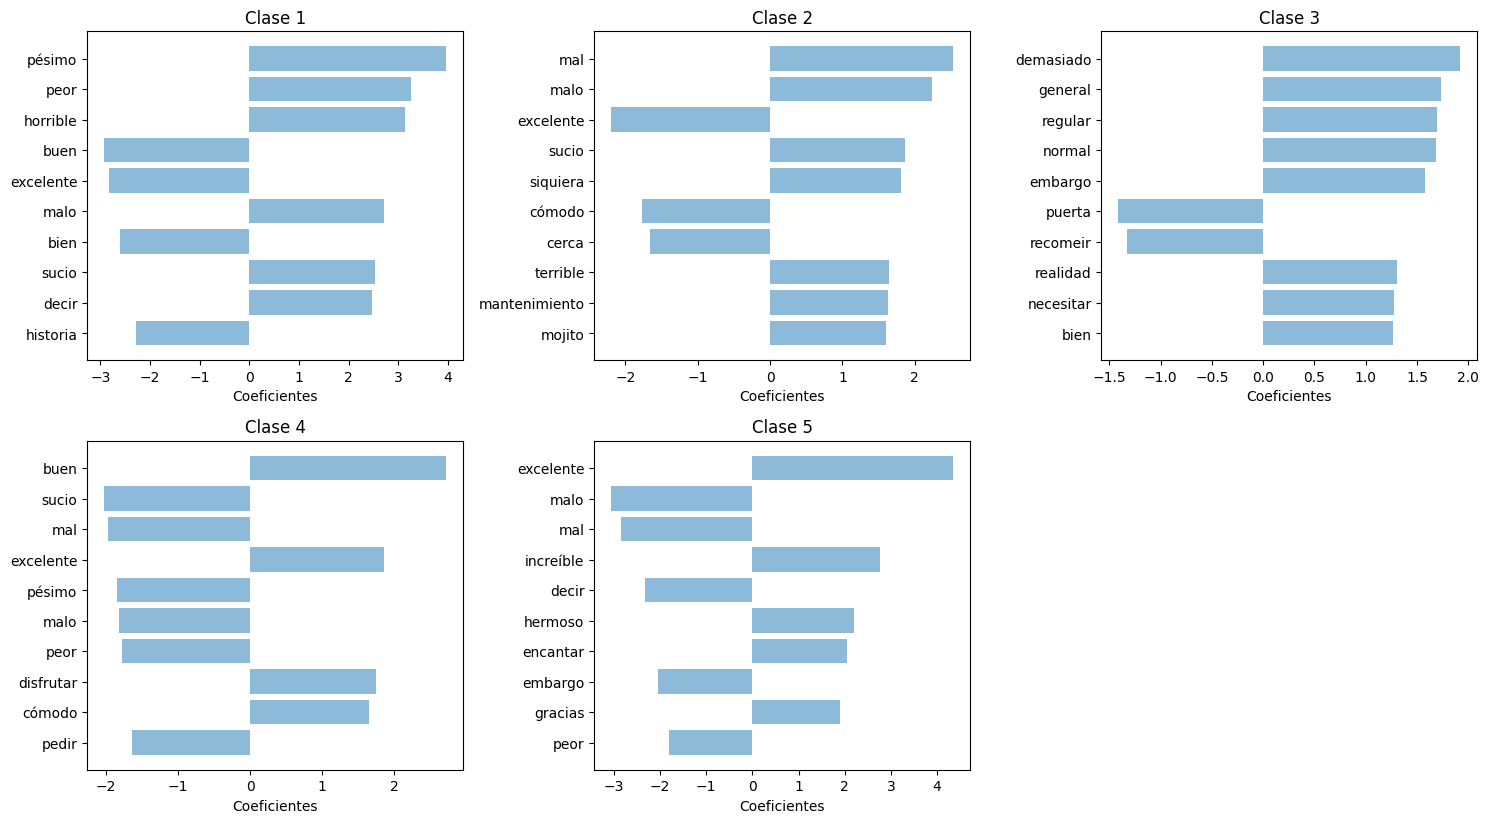

In [ ]:

feature_names = tfidf_vectorizer.get_feature_names_out()
num_classes = log_reg.coef_.shape[0]
num_top_features = 10

# Calcula el número de filas y columnas que necesitarás para tu cuadrícula de gráficos
# Por ejemplo, para 4 clases, podrías querer una disposición de 2x2
num_rows = int(np.ceil(num_classes**0.5))
num_cols = num_rows

# Configura el tamaño total de la figura que contendrá todos los subplots
plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Itera sobre cada clase para crear su subplot
for class_index in range(num_classes):
    # Extrae los coeficientes de esta clase y ordénalos
    class_coefficients = log_reg.coef_[class_index]
    sorted_features_by_class = sorted(zip(feature_names, class_coefficients), key=lambda x: abs(x[1]), reverse=True)
    top_features = sorted_features_by_class[:num_top_features]
    words = [feature for feature, coef in top_features]
    coefficients = [coef for feature, coef in top_features]
    
    # Crea el subplot para esta clase
    plt.subplot(num_rows, num_cols, class_index + 1)
    y_pos = range(len(words))
    plt.barh(y_pos, coefficients, align='center', alpha=0.5)
    plt.yticks(y_pos, words)
    plt.xlabel('Coeficientes')
    plt.title(f'Clase {class_index+1}')
    plt.gca().invert_yaxis()

# Ajusta los subplots para que no se solapen títulos y ejes
plt.tight_layout()
plt.show()

Se puede ver la distribución de la influencia de cada palabra por clase.

Por último, se analiza la curva de aprendizaje:

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=log_reg,
    X=X,  # The input features
    y=y,  # The target classes
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes (10 points from 10% to 100% of the total training set size)
    cv=5,  # Cross-validation splitting strategy
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1  # Use all computer processors to speed up the process
)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

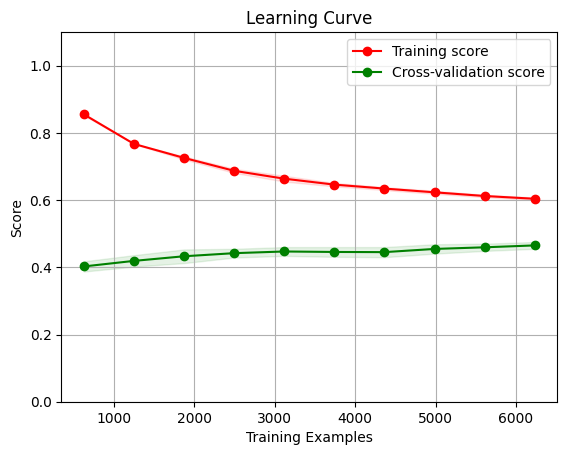

In [ ]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()

# Plot the learning curve for the training set
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the learning curve for the cross-validation set
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Con respecto al anterior gráfico se concluye que, al no haber un punto de convergencia entre cross-validation y training score, el modelo esta overfitting y podría ser mejorado con mayor información de entrenamiento. A su vez también se podrían realizar ajustes en el preprocesamiento y escogencía de los hiperparametros sin embargo, como ya se ha dicho se realizaron todas las pruebas correspondientes a esta segunda opción y el modelo no mejora.

## Random Forest

Se revisa el estado actual de los datos

In [ ]:
reviews_df.head()

,Review,Class,has_non_ascii,Conteo,Max,Min,Moda,words
0,buen atención aclaración duda parte seorito ve...,5,True,252,20,0,de,"[buen, atención, aclaración, duda, parte, seor..."
1,buen hotel si obligado cerca centro convención...,3,True,297,13,1,de,"[buen, hotel, si, obligado, cerca, centro, con..."
2,lugar lindo fotografías visitir selín música v...,5,True,104,12,1,Es,"[lugar, lindo, fotografías, visitir, selín, mú..."
3,abusado factura alimento siempre echar culpa i...,3,True,422,14,1,y,"[abusado, factura, alimento, siempre, echar, c..."
4,par persona grupo realmente querer comer cabri...,3,True,419,14,1,el,"[par, persona, grupo, realmente, querer, comer..."


In [ ]:
reviews_df.shape

(7794, 8)

Se realiza la vectorización usando TF-IDF vectorizer debido a que, por medio de prueba y error, fue el mejor método. Esto basado, en las métricas individuales y grupales de precisión, f1_score y recall.

In [ ]:
#Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.5, ngram_range=(1, 3),sublinear_tf=True)

# Fit and transform the preprocessed text data to numerical data
X = tfidf_vectorizer.fit_transform(reviews_df['Review'])
y = reviews_df['Class']

In [ ]:
#Define groups for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [ ]:
#Show results
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           1       0.52      0.29      0.37       151
           2       0.39      0.33      0.36       231
           3       0.31      0.30      0.30       281
           4       0.41      0.36      0.39       401
           5       0.55      0.72      0.62       495

    accuracy                           0.45      1559
   macro avg       0.43      0.40      0.41      1559
weighted avg       0.44      0.45      0.44      1559



In [ ]:
print(confusion_matrix(y_test,prediction_test))

[[ 44  51  32   6  18]
 [ 27  77  68  26  33]
 [ 12  46  84  77  62]
 [  1  14  61 146 179]
 [  1  10  27 102 355]]


Dado que ese resultado puede mejorar, se realiza la búsqueda de los hiperparámetros con el fin de optimizar las métricas del la clasificación 

1. Estimar lo profundidad máxima de cada árbol 

In [ ]:
#GridSearchCV to find optimal max_depth  
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

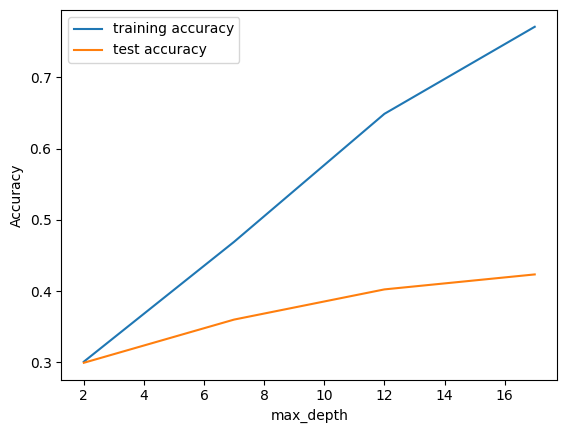

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2. Definir el número de estimadores óptimos 

In [ ]:
# GridSearchCV to find optimal n_estimators
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 500, 100)},
             return_train_score=True, scoring='accuracy')

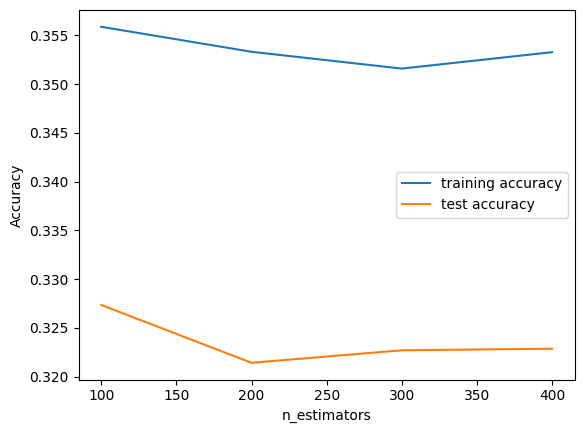

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3. Hallar el número mínimo de hojas del árbol

In [ ]:
# GridSearchCV to find optimal min_samples_leaf  
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 70, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 70, 5)},
             return_train_score=True, scoring='accuracy')

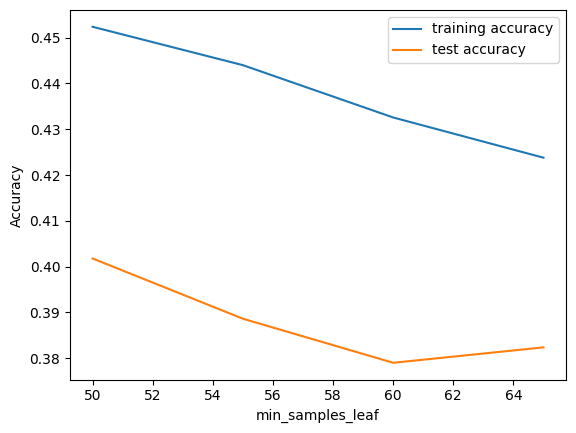

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4. Estimar el número de ejemplos mínimos 

In [ ]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 100)},
             return_train_score=True, scoring='accuracy')

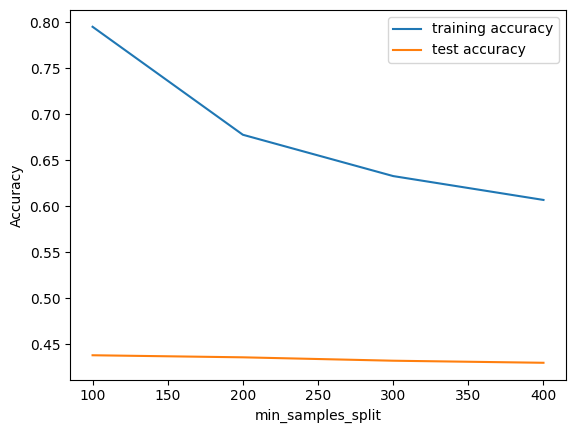

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Ahora, para los diferentes hiperparámetros, se debe definir cál es el valor ópitimo. Por tantom se busca el mejor valor en los rangos defindios en las gráficas. Al final, se puede constrastar con las gráficas si los valores halladso tienen o no sentido.

In [ ]:
# Specify number of folds for k-fold CV
n_folds = 5

# Create K-fold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Se hyperparameters
param_grid = {
    'n_estimators': [100, 500, 100],
    'max_depth': [2, 20, 5],
    'min_samples_split': [100, 500, 100],
    'min_samples_leaf': [50, 70, 5],
    'bootstrap': [True, False]
}

# Create classifier 
rf = RandomForestClassifier(random_state=42)

# Create gridsearch object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=kf, scoring='accuracy', n_jobs=-1)

# Search the hyperparameters
grid_search.fit(X_train, y_train)

# Show the best values for each hyperparameter
print("Mejores hiperparámetros:", grid_search.best_params_)

# Show the best score for the calculated hyperparamters using the classififer
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 500}
Mejor puntuación: 0.423897353648757


Una vez se conocen los valores de los hiperpárametros, se puede instanciar de nuevo el modelo y probar si la búsqueda scon hiperparametros mejora las métricas o no. A partir de ello, se puede definir el mejor resultado para el algoritmo de random forest.

In [ ]:
# Define the best hypermarameters
best_n_estimators = 500
best_max_depth = 20
best_min_samples_split = 100
best_min_samples_leaf = 5
best_bootstrap = True

# Create classifer with the hyperparams defined
rf = RandomForestClassifier(n_estimators=best_n_estimators,
                             max_depth=best_max_depth,
                             min_samples_split=best_min_samples_split,
                             min_samples_leaf=best_min_samples_leaf,
                             bootstrap=best_bootstrap,
                             random_state=42)

# Train model
rf.fit(X_train, y_train)

# Make the prediction of the y variable
predictions = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.64      0.14      0.23       151
           2       0.40      0.35      0.37       231
           3       0.31      0.19      0.24       281
           4       0.37      0.24      0.29       401
           5       0.48      0.85      0.61       495

    accuracy                           0.43      1559
   macro avg       0.44      0.35      0.35      1559
weighted avg       0.42      0.43      0.39      1559



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 21  66  24   7  33]
 [ 10  80  50  26  65]
 [  2  41  54  74 110]
 [  0  11  37  97 256]
 [  0   4   9  59 423]]


Como conclusión, nos podemos dar cuenta que la búsqueda de y definición de hiperparámetros no mejora el modelo resultante del algoritmo de random forest. Por tanto, se debe tomar el modelo inicial con las métricas ya definidas.

Del primer modelo se puede decir que para cada uno de los conjuntos por clasificar:
Grupo1: Al tener una precisión algo alta aunque bajo recall y f1_score, se puede decir que el modelo está prediciendo correctamente la clase positiva en la mayoría de los casos, pero está perdiendo muchos casos positivos que debería haber identificado.
Grupo2,3,4: Debido a que todas sus métricas son bajas, se puede concluir que el modelo está teniendo dificultades para realizar predicciones precisas en general y está perdiendo tanto instancias positivas como negativas de manera significativa.
Grupo5: En este caso al haber una precisión algo alta y recall alto, se puede pensar que todo está bien. Sin embargo, el f1_score es bajo, esto significa que el modelo está favoreciendo una clase sobre la otra y puede haber un desequilibrio entre precisión y recall.

En general, para turismo de los Alpes, el algoritmo se random forest solo puede garantizar una certeza ligera el su modelo de predicción para poder determinar la calificación de los reviews que reciben una calificación baja.

## Neural Network

El siguiente modelo a entrenar es una red neuronal debido a que nos permite clasificar de manera sencilla las reviews mediante neuronas que  encuentran patrones en la ocurrencia de las palabras dentro del las reviews.

### Particionamiento de los datos de entrenamiento

Para esta fase, se tiene que vectorizar la ocurrencia de las palabras para que sea más facil para el modelo encontrar los patrones que determinaran la clasificacion. Además para evitar problemas de indexacion gracias a que en Python comienza desde 0 se transforma Class de un rango de 1 a 5 a un rango de 0 a 4.

In [ ]:
X = reviews_df['words'].apply(lambda x: ' '.join(x))
y = reviews_df['Class']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()
y = y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Definición de la arquitectura de la red

Se va a hacer uso de un modelo secuencial ya que permite definir la arquitectura de la red neuronal capa por capa, de manera secuencial. Esto significa que cada capa en el modelo tiene exactamente una entrada y una salida, y la salida de una capa se convierte en la entrada de la siguiente capa. Vamos a usar 2 capas densas  que se reducen en 0,5  en cada capa. Además entre cada capa densa se va a hacer uso de una capa de Dropout que ayuda al overfitting desactivando la mitad de las neuronas seleccionadas aleatoriamente en cada iteración del entrenamiento. La capa de salida va a ser de 5 neuronas debido a que son 5 las etiquetas a categorizar.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

2024-04-08 00:06:00.757941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-08 00:06:00.757975: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-08 00:06:00.757995: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-1cccf43b-5772-43d8-8ebe-f06dfb108cfe): /proc/driver/nvidia/version does not exist
2024-04-08 00:06:00.758254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Entrenamiento del modelo

Para el entrenamiento de la red se va a hacer uno de la función de perdida  sparse_categorical_crossentropy debido a que es un problema de clasificación de etiquetas enteras y el optimizador adam para reducir el tiempo de entrenamiento.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.2)


Epoch 1/4
156/156 [==============================] - 5s 27ms/step - loss: 1.4136 - accuracy: 0.3472 - val_loss: 1.1942 - val_accuracy: 0.4587
Epoch 2/4
156/156 [==============================] - 4s 26ms/step - loss: 1.0658 - accuracy: 0.5389 - val_loss: 1.1683 - val_accuracy: 0.4771
Epoch 3/4
156/156 [==============================] - 4s 26ms/step - loss: 0.7195 - accuracy: 0.7109 - val_loss: 1.3334 - val_accuracy: 0.4651
Epoch 4/4
156/156 [==============================] - 4s 26ms/step - loss: 0.4282 - accuracy: 0.8482 - val_loss: 1.5755 - val_accuracy: 0.4643


### Evaluación del modelo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

49/49 [==============================] - 0s 5ms/step - loss: 1.5449 - accuracy: 0.4631
Accuracy: 0.463117390871048


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) + 1

report = classification_report(y_test + 1, predicted_classes)
print(report)

49/49 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           1       0.50      0.46      0.48       151
           2       0.39      0.31      0.34       231
           3       0.31      0.41      0.35       281
           4       0.43      0.51      0.46       401
           5       0.68      0.53      0.60       495

    accuracy                           0.46      1559
   macro avg       0.46      0.44      0.45      1559
weighted avg       0.49      0.46      0.47      1559



Se obtuvo una precisión de 0.45 en las predicciones. También se puede observar que el modelo es mejor detectando reviews muy buenas o muy malas ya que la precisión en la clasificación de 1 y 5 son mayores que las de calificaciones intermedias. Con respecto al f1-score también podemos observar la dificultad que se le presenta al modelo sobre todo con las calificaciones de 2 y 3.

### Análisis del error

En esta gráfica podemos ver que en el paso de las iteraciones de entrenamiento el modelo fue mejorando con respecto al modelo de entrenamiento. Pero en el caso de el conjunto de prueba no mejoró mucho y se mantuvo constante desde la primera.

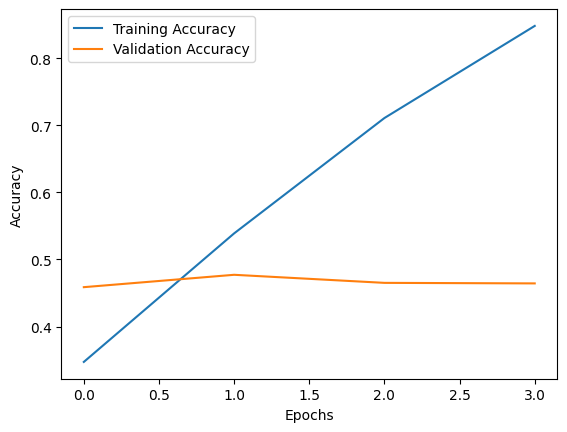

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Aquí se puede observar que la mayoría de los datos predichos tienen un error de 1 y hay muy poco error con un margen muy alto de diferencia.

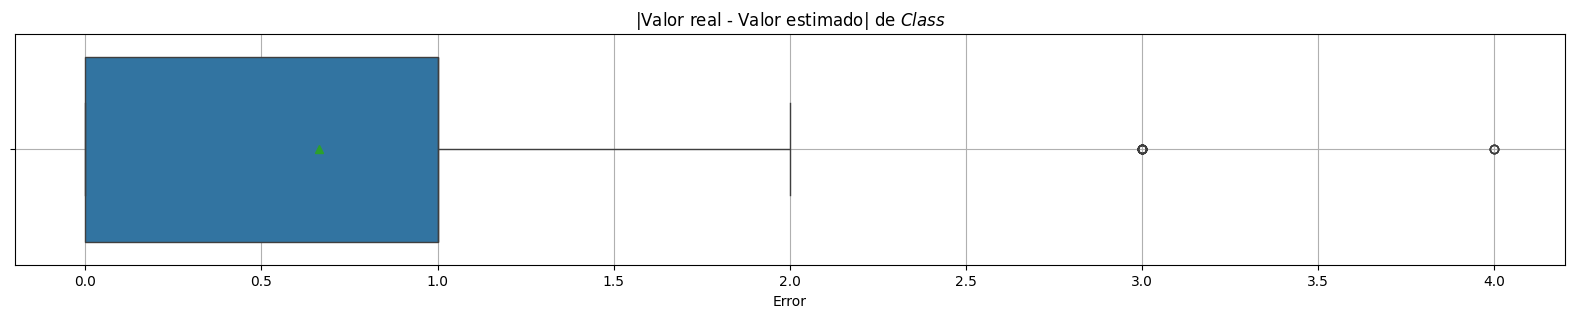

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs((y_test+1) - predicted_classes), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Class}$")
plt.xlabel("Error")
plt.grid()
plt.show()

En los percentiles del error podemos ver que el 75% de las calificaciones que predijo el modelo tienen un valor máximo de 1. Esto nos dice que el modelo es muy bueno detectando si una review es buena o mala pero le cuesta detectar la puntuación exacta.

In [ ]:
abs((y_test+1) - predicted_classes).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    1559.000000
mean        0.662604
std         0.718600
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
95%         2.000000
99%         3.000000
max         4.000000
Name: Class, dtype: float64

### Conclusión

Dentro de los algoritmos evaluados, se como equipo, escogemos el de Regresión logística debido a que presenta mejores métricas. Sin embargo, es importante aclarar que este algoritmo tiene mucho espacio para la mejora. En caso tal de turismo Alpes desee utilizar nuestro modelo, es importante tener en cuenta que, los grupos de reviews clasificados con 1 y 5 son lo que mejor puede llegar a determinar a partir de una nueva review aunque los demás grupos no los clasifica de la mejor forma.

Una forma de mejorar el modelo es alimentar el modelo con más datos entrenados en vez de solo mejorar el entendimiento y limpieza  dela información. Esto permitiría brindarle al modelo más datos y formas de aplicar la clasificación de diversas características presentes en los diferentes reviews que se pueden encontrar en turismo los Alpes.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cccf43b-5772-43d8-8ebe-f06dfb108cfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>